Load in all libraries needed for the notebook

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, recall_score, roc_auc_score, roc_curve, r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

Importing the datset into the notebook

In [2]:
# Loading datset
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
# Checking loaded dataset
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Stage 1: Data Cleaning

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
# Data Checking
df.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23276,23276,7wwA5QBXfOkeYHzNbbVXtT,Jan Blomqvist,Remote Control (Remixed),Same Mistake - But Different Remix,52,216445,False,0.656,0.503,...,-12.465,1,0.0407,0.135000,0.905000,0.0864,0.0906,121.000,4,deep-house
40820,40820,4lllhWC7t23yII6bYoYwPn,Mauro Henrique,Pequeninos,Pequeninos,39,228631,False,0.480,0.781,...,-3.897,0,0.0435,0.201000,0.000000,0.0911,0.3290,147.552,4,gospel
53698,53698,6b0niK2zmoE9kZY5HkLGen,Tungevaag;Raaban;A7S,10's Dance Classics,Hey Baby,0,180490,False,0.694,0.888,...,-2.983,1,0.0723,0.035300,0.000000,0.2750,0.6910,124.996,4,house
16768,16768,75VfoYbX5SOhJpEQKXzUtG,Wolfgang Amadeus Mozart;Alicia de Larrocha,Mozart - Inspiring Classics,"Piano Sonata No. 11 in A Major, K. 331: 1f. Va...",6,62626,False,0.443,0.131,...,-22.363,1,0.0391,0.990000,0.942000,0.1270,0.8400,138.661,4,classical
5695,5695,4ExVFhrJqFqgKSUAqDM5AZ,Satoshi Takebe,From Up On Poppy Hill Soundtrack,Summer of Farewells - From Up On Poppy Hill (V...,50,248186,False,0.485,0.330,...,-10.062,0,0.0309,0.828000,0.000207,0.1210,0.2520,105.007,3,anime
35386,35386,1QJXAmnCg9LpjzP9nQsCDq,Chicão dos Teclados,Seresta 2020,Boate Azul,42,96888,False,0.920,0.510,...,-7.594,0,0.0671,0.435000,0.000000,0.5040,0.8630,126.979,4,forro
60297,60297,0x9etknOh8k5RA1NXAxjx4,Beenie Man;Wyclef Jean,Art And Life,Love Me Now,24,318531,False,0.678,0.884,...,-5.032,1,0.1010,0.000052,0.000011,0.1430,0.4580,99.761,4,j-dance
102766,102766,7qGzgOQYxfLbQGqZTiVqTl,Isak Danielson,Power,Power,60,207000,False,0.375,0.495,...,-6.892,0,0.0480,0.212000,0.000001,0.0567,0.1730,115.751,4,songwriter
84319,84319,3TETmhGNWOcquUTtcr6RIR,The Animals,The House of the Rising Sun: Best of The Animals,The House of the Rising Sun,58,269906,False,0.316,0.484,...,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.2990,117.363,3,psych-rock
54591,54591,5py3bLyjp3gge3KJGfOI2H,Telefon Tel Aviv,Fahrenheit Fair Enough,7 8 - Archive '99,11,231936,False,0.589,0.923,...,-7.986,1,0.0391,0.126000,0.838000,0.2550,0.3990,147.970,1,idm


In [ ]:
df.shape

(114000, 21)

In [ ]:
len(df["track_id"].unique())

89741

In [ ]:
#Check for duplicates (there are duplicates)
duplicate_track_count = df.shape[0] - len(df["track_id"].unique())
print(f"Number of duplicate track IDs: {duplicate_track_count}")

Number of duplicate track IDs: 24259


In [ ]:
track_id_counts = df.groupby('track_id')['track_id'].count()
duplicate_track_ids = track_id_counts[track_id_counts > 1]
print(duplicate_track_ids)

track_id
001APMDOl3qtx1526T11n1    2
001YQlnDSduXd5LgBd66gT    2
003vvx7Niy0yvhvHt4a68B    3
004h8smbIoAkUNDJvVKwkG    2
006rHBBNLJMpQs8fRC2GDe    3
                         ..
7ztSVy67w9rXpKg5L2zN5l    2
7zubR9uYAWjb5KPZTMm85e    4
7zumacGldlmxpoP8bpaeLe    2
7zv2vmZq8OjS54BxFzI2wM    2
7zwn1eykZtZ5LODrf7c0tS    3
Name: track_id, Length: 16641, dtype: int64


In [ ]:
df.select_dtypes('number').describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# Find the number of unique genres (should be 125)
unique_genres_count = df['track_genre'].nunique()
print(f"Number of unique genres: {unique_genres_count}")

Number of unique genres: 114


In [ ]:
# Find the number of unique modes(should be 2)
unique_mode_count = df['mode'].nunique()
print(f"Number of unique mode: {unique_mode_count}")

Number of unique mode: 2


In [ ]:
# Find the number of unique keys(should be 12)
unique_key_count = df['key'].nunique()
print(f"Number of key mode: {unique_key_count}")

Number of key mode: 12


In [ ]:
# Check for missing values in each of the columns
for column in df.columns:
  missing_values = df[column].isnull().sum()
  print(f"'{column}':{missing_values}")

'Unnamed: 0':0
'track_id':0
'artists':1
'album_name':1
'track_name':1
'popularity':0
'duration_ms':0
'explicit':0
'danceability':0
'energy':0
'key':0
'loudness':0
'mode':0
'speechiness':0
'acousticness':0
'instrumentalness':0
'liveness':0
'valence':0
'tempo':0
'time_signature':0
'track_genre':0


In [ ]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

print(rows_with_missing_values)

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [ ]:
# Look at the data types of each column
print(df.dtypes)

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [4]:
# Data Cleaning Function
def clean_data(df):
  clean_df = df.copy()
  clean_df = clean_df.drop('Unnamed: 0', axis=1, errors='ignore')
  clean_df = clean_df.dropna()

  #Encode explicit column (binary encoding)
  clean_df['explicit'] = clean_df['explicit'].astype(int)

  #Remove track_id, artists,album_name, track_name, track_genre
  clean_df = clean_df.drop(['track_id', 'artists', 'album_name', 'track_name','track_genre'], axis=1)

  return clean_df

In [8]:
spotify_cleaned_df = clean_data(df)
# Checking the clean data
spotify_cleaned_df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
5,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4
6,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
7,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4
8,74,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4
9,56,205594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4


### Stage 2: Exploratory Data Analysis

In [ ]:
# Calculate summary statistics for numeric columns
summary_stats = cleaned_df.describe()
print(summary_stats)

          popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       

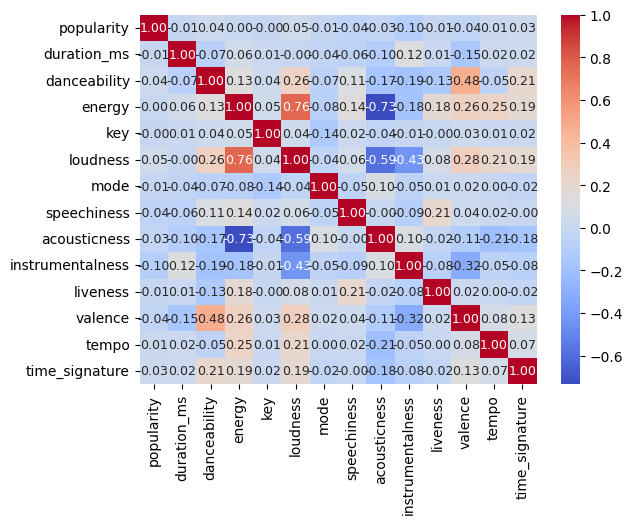

In [ ]:
# Correlation matrix
numeric_cols = spotify_cleaned_df.select_dtypes(include=['number'])
# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Visualize with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",annot_kws={"size": 9})
plt.show()

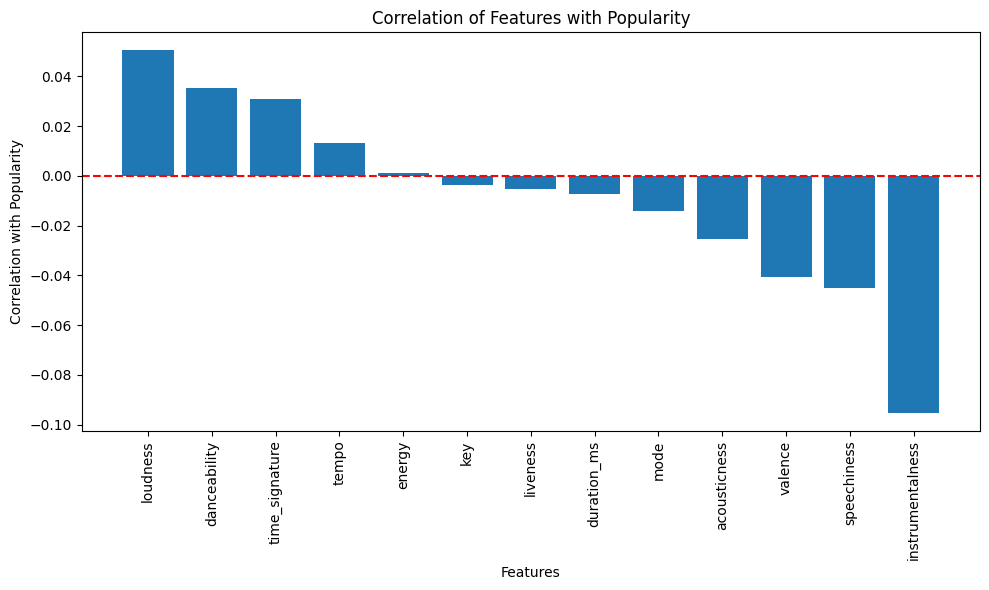

In [ ]:
# Calculate the correlation between numerical features and popularity
correlation_with_popularity = numeric_cols.corr()['popularity'].sort_values(ascending=False)

# Remove the correlation with itself (popularity with popularity)
correlation_with_popularity = correlation_with_popularity.drop('popularity')

# Create a bar plot of the correlation values
plt.figure(figsize=(10, 6))
plt.bar(correlation_with_popularity.index, correlation_with_popularity.values)
plt.axhline(y=0, color='red', linestyle='--')  # Add a line at y=0
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Correlation with Popularity')
plt.title('Correlation of Features with Popularity')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

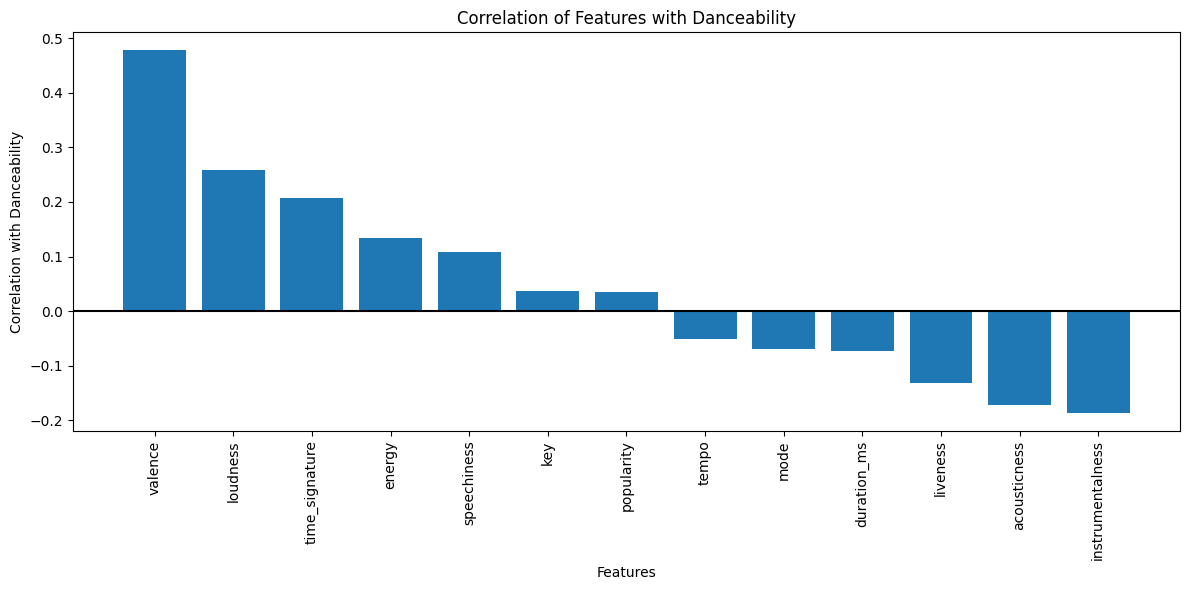

In [ ]:
# Calculate correlations between numeric features and 'danceability'
correlation_with_danceability = numeric_cols.corr()['danceability'].sort_values(ascending=False)

# Remove the correlation with 'danceability' itself
correlation_with_danceability = correlation_with_danceability.drop('danceability')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(correlation_with_danceability.index, correlation_with_danceability.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Danceability')
plt.title('Correlation of Features with Danceability')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=0, color='black', linestyle='-')  # Add a line at y=0
plt.tight_layout()
plt.show()

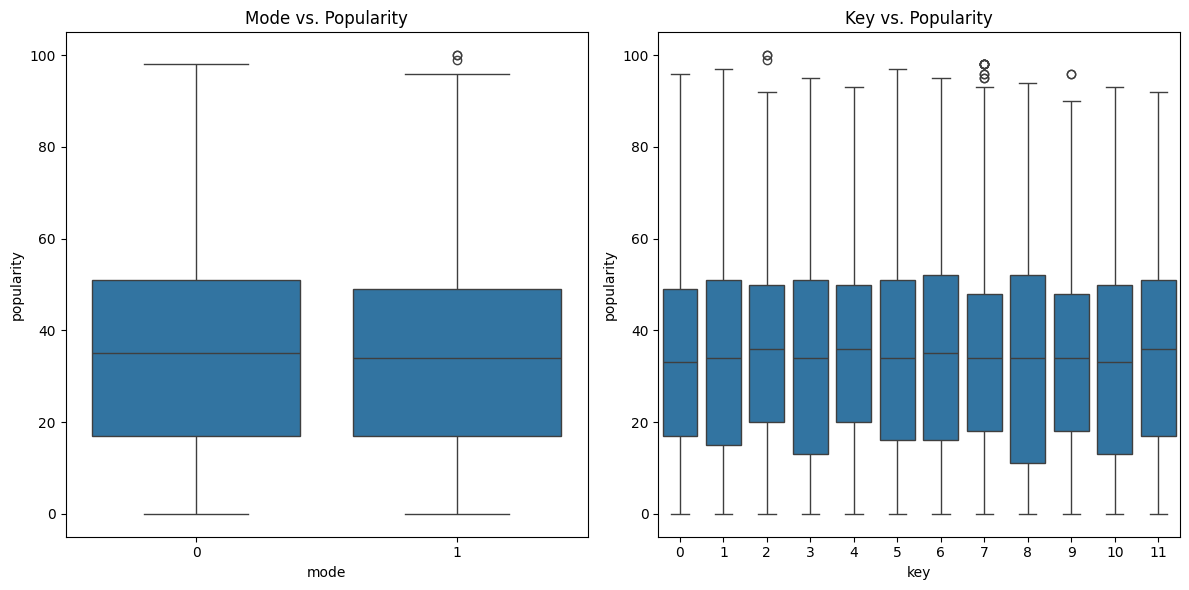

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for mode vs popularity
sns.boxplot(x='mode', y='popularity', data=spotify_cleaned_df, ax=axes[0])
axes[0].set_title('Mode vs. Popularity')

# Box plot for key vs popularity
sns.boxplot(x='key', y='popularity', data=spotify_cleaned_df, ax=axes[1])
axes[1].set_title('Key vs. Popularity')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

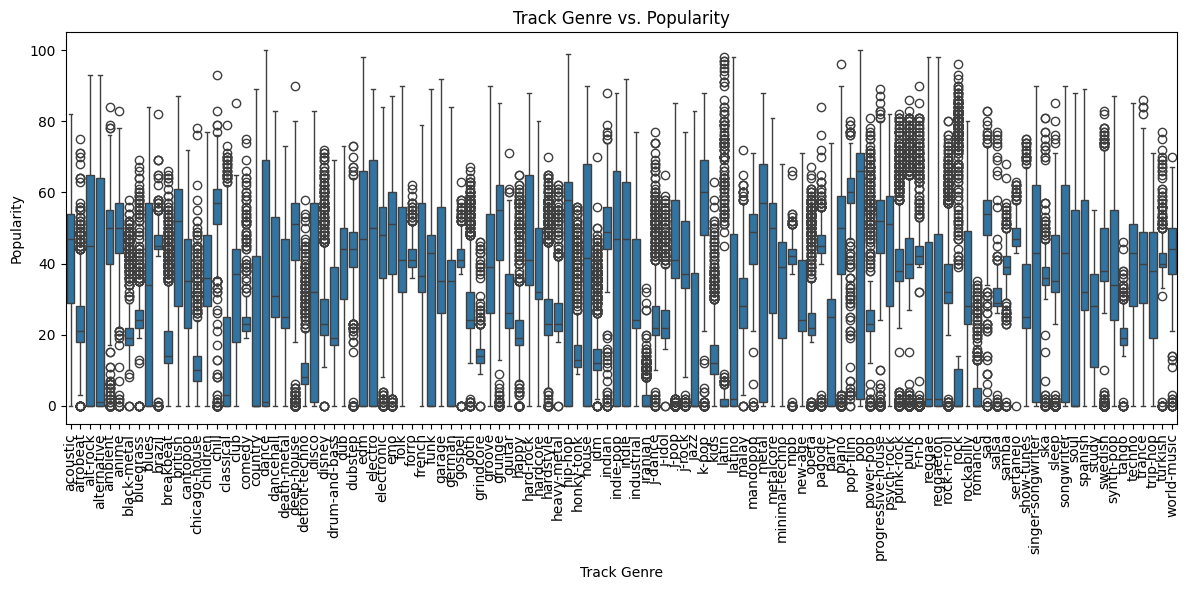

In [ ]:
# Create a box plot of track genre vs popularity
plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='popularity', data=spotify_cleaned_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Track Genre')
plt.ylabel('Popularity')
plt.title('Track Genre vs. Popularity')
plt.tight_layout()
plt.show()

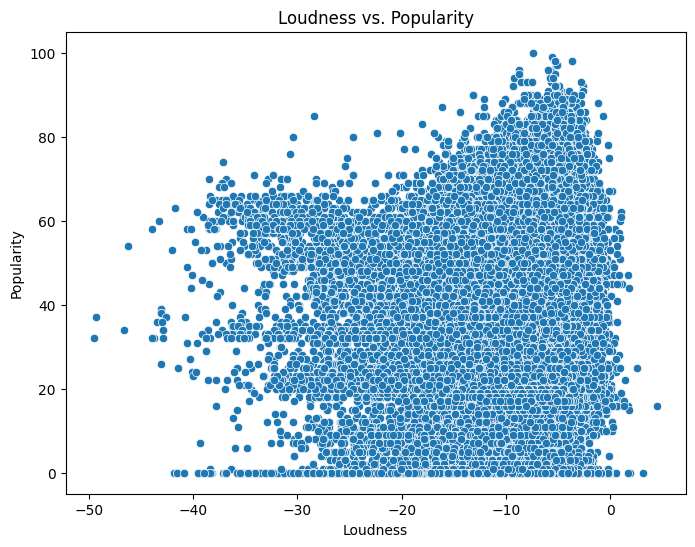

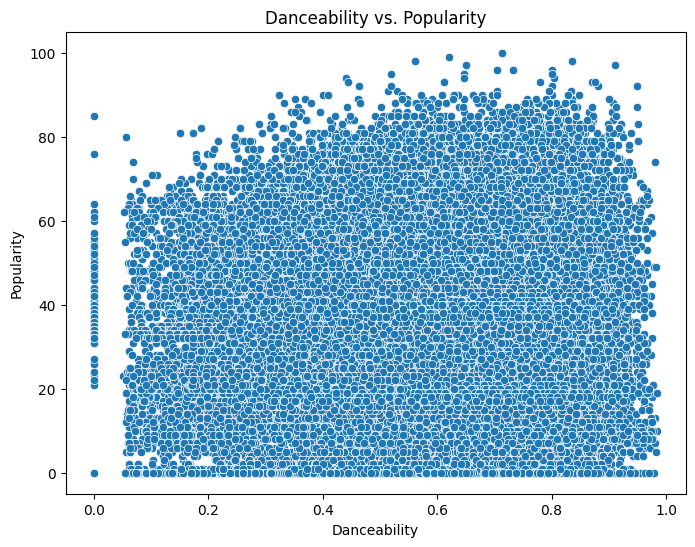

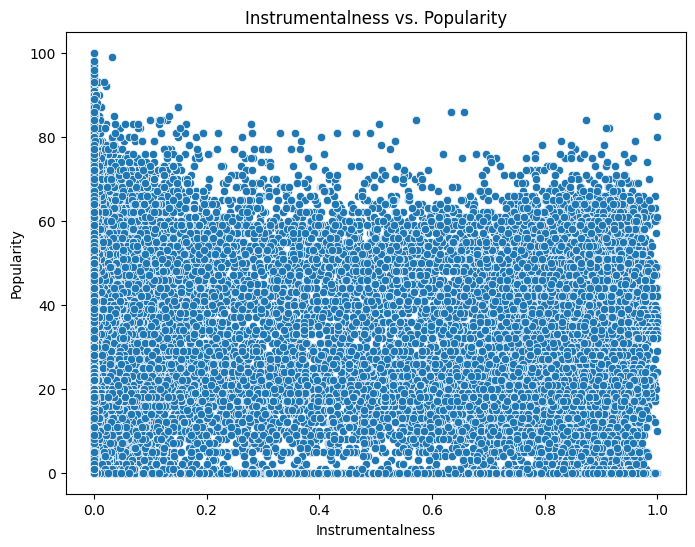

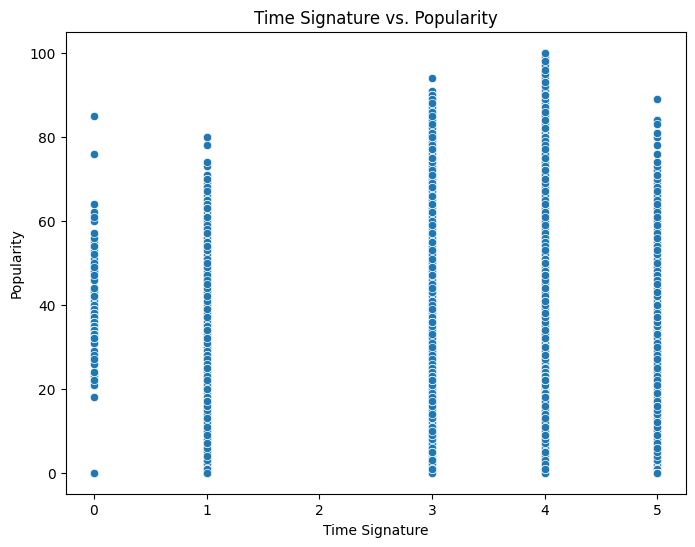

In [ ]:
# Scatter plot for loudness vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Loudness vs. Popularity')
plt.show()

# Scatter plot for danceability vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs. Popularity')
plt.show()

# Scatter plot for instrumentalness vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='instrumentalness', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Instrumentalness vs. Popularity')
plt.show()

# Scatter plot for time_signature vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='time_signature', y='popularity', data=spotify_cleaned_df)
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.title('Time Signature vs. Popularity')
plt.show()

### Stage 3: Logistic Regression

In [9]:
# Split data into train and testing set
X_train, X_test, y_train, y_test = train_test_split(spotify_cleaned_df.drop('explicit', axis=1), spotify_cleaned_df['explicit'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91199, 14), (22800, 14), (91199,), (22800,))

In [10]:
y_train.head()

,explicit
96253,0
70417,0
66688,0
51391,0
95123,0


In [11]:
#Class imbalance in y_train
y_train.value_counts()

,count
explicit,
0,83348
1,7851


In [12]:
7851/(7851+83348)*100 #Really small percentage of explicit (True)

8.60864702463843

In [13]:
#Fit logistic regression model
lr_train = LogisticRegression(solver='liblinear', class_weight='balanced')
lr_train.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [14]:
# View the model intercept and coefficients
lr_train.intercept_, lr_train.coef_

(array([0.00789614]),
 array([[ 6.59830044e-03, -4.31844307e-06,  2.67135540e+00,
          2.58558137e-01, -2.16660751e-03,  7.63436797e-02,
         -1.18631545e-01,  5.72318090e+00, -1.52804856e+00,
         -1.36642790e+00, -3.39771305e-01, -1.87160457e+00,
         -8.31284919e-04,  1.04495359e-01]]))

### Stage 4: Evaluation Metrics

In [ ]:
#Confusion Matrix

In [ ]:
# Prediction Accuracy

In [ ]:
# Sensitivity (TPR)

In [ ]:
# Specificity (TNR)

In [ ]:
#Classification Report

In [19]:
# Area Under the Curve (under the ROC curve) Score
y_pred_test = lr_train.predict(X_test)
roc_auc_score(y_test, y_pred_test)

0.7362012357879542

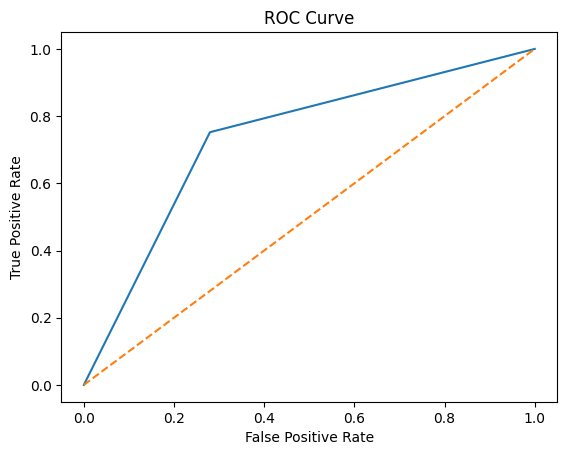

In [20]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Stage 5: Cross Validation

In [ ]:
#Cross Validation for Model Performance
cross_val_score(lr_train, X_test, y_test, cv=5,scoring='roc_auc')

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_lr = clone(lr_train)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    print(test_index)
    clone_lr.fit(X_train_folds, y_train_folds)
    y_pred = clone_lr.predict(X_test_fold)

    auc = roc_auc_score(y_test_fold, y_pred)
    accuracy_score = accuracy_score(y_test_fold, y_pred)
    print(f"Fold {i}: AUC = {auc}, Accuracy = {accuracy_score}")
    i += 1